In [14]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [15]:
df = pd.read_csv('Desktop/Speed_Dating_Clean.csv')

In [16]:
match = pd.DataFrame(df['match'])
data_X = df.drop(['match','decision','decision_o','Unnamed: 0'],axis =1)

In [17]:
# change gender into binary
def gender(value): 
    if value == 'female': 
        return 0 
    else: 
        return 1
male = data_X['gender'].map(gender)
data_X['gender'] = male

In [18]:
def d_d_age(value): 
    if value == '[2-3]': 
        return 2
    if value == '[4-6]': 
        return 3
    if value == '[0-1]': 
        return 1
    if value == '[7-37]': 
        return 4
dage = data_X['d_d_age'].map(d_d_age)
data_X['d_d_age'] = dage

In [19]:
def race(value): 
    if value == 'asian/pacific islander/asian-american': 
        return 1
    if value == 'black/african american': 
        return 2
    if value == 'european/caucasian-american': 
        return 3
    if value =='latino/hispanic american': 
        return 4
    else: 
        return 5
racee = data_X['race'].map(race)
data_X['race'] = racee

In [20]:
race_o =data_X['race_o'].map(race)
data_X['race_o'] = race_o

In [21]:
study1 = list(data_X['field'].value_counts().index)
def study(value): 
    if value in study1: 
        return study1.index(value)
study_idx = data_X['field'].map(study)
data_X['field'] = study_idx

In [22]:
data_X[:5]

,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,...,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met
0,0,21.0,27.0,6,3,1,3,0,2.0,4.0,...,10.0,9.0,8.0,1.0,0.14,3.0,4.0,7.0,6.0,0.0
1,0,21.0,22.0,1,1,1,3,0,2.0,4.0,...,10.0,9.0,8.0,1.0,0.54,3.0,4.0,7.0,5.0,1.0
2,0,21.0,22.0,1,1,1,1,1,2.0,4.0,...,10.0,9.0,8.0,1.0,0.16,3.0,4.0,7.0,0.0,1.0
3,0,21.0,23.0,2,2,1,3,0,2.0,4.0,...,10.0,9.0,8.0,1.0,0.61,3.0,4.0,7.0,6.0,0.0
4,0,21.0,24.0,3,2,1,4,0,2.0,4.0,...,10.0,9.0,8.0,1.0,0.21,3.0,4.0,6.0,6.0,0.0


# Under - Sampling to deal with class imbalance

In [23]:
data_X2 = data_X.copy()
data_X2['match'] = match 

In [24]:
# first you need to select the ones from majority class and pick it at random
no_match = len(data_X2[data_X2['match'] == 0])
no_match_indices = data_X2[data_X2.match == 0].index
random_indices = np.random.choice(no_match_indices,no_match, replace=False)

In [25]:
# get the matched indices and then concatenate to get final
match_indices = data_X2[data_X2.match == 1].index
under_sample_indices = np.concatenate([match_indices,random_indices])
under_sample = data_X2.loc[under_sample_indices]

In [26]:
X_under = under_sample.loc[:,under_sample.columns != 'match']
y_under = under_sample.loc[:,under_sample.columns == 'match']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)

In [27]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_under_train, y_under_train)

In [28]:
preds = clf.predict(X_under_test)
print('Accuracy on test data is:',(accuracy_score(y_under_test,preds)))

Accuracy on test data is: 0.8008921330089214


In [29]:
print('The confusion matrix is:\n',confusion_matrix(y_under_test,preds))
print(classification_report(y_under_test,preds))

The confusion matrix is:
 [[1810  257]
 [ 234  165]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2067
           1       0.39      0.41      0.40       399

   micro avg       0.80      0.80      0.80      2466
   macro avg       0.64      0.64      0.64      2466
weighted avg       0.81      0.80      0.80      2466



# SMOTE Analysis

In [30]:
x_train, x_val, y_train, y_val = train_test_split(data_X, match,
                                                  test_size = .1,
                                                  random_state=12)

In [31]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [33]:
# this is the result that we would get on the validation set
print('The confusion matrix is:\n',confusion_matrix(y_val,clf_rf.predict(x_val)))
print(classification_report(y_val, clf_rf.predict(x_val)))

The confusion matrix is:
 [[667  38]
 [ 62  55]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       705
           1       0.59      0.47      0.52       117

   micro avg       0.88      0.88      0.88       822
   macro avg       0.75      0.71      0.73       822
weighted avg       0.87      0.88      0.87       822



In [34]:
# this is the result that we would get on the test set which is the entire dataset 
print('The confusion matrix is:\n',confusion_matrix(match,clf_rf.predict(data_X)))
print(classification_report(match, clf_rf.predict(data_X)))

The confusion matrix is:
 [[6830   40]
 [  63 1287]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6870
           1       0.97      0.95      0.96      1350

   micro avg       0.99      0.99      0.99      8220
   macro avg       0.98      0.97      0.98      8220
weighted avg       0.99      0.99      0.99      8220



# SVM

In [44]:
#Creating the standard scaler 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter("ignore")
scaler = StandardScaler()

# creating svc. Here we use the default instead of linear as mentioned on the piazza post. 
svc_clf = SVC()

# Creating the pipeline
pipe = Pipeline(steps=[('sca',scaler ), ('svc', svc_clf)])

#Pass the pipeline in to a cross_val_score 
scores = cross_val_score(pipe, data_X, match, cv=5)

#printing the average accuracy
print('Average Accuracy:',scores.mean()*100)

Average Accuracy: 83.91727493917274


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# for the 'svm' part of the pipeline, tune the 'kernel' hyperparameter
param_grid = {'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# your code goes here
grid_search = GridSearchCV(pipe,param_grid,cv = 5,scoring ='accuracy')
grid_search.fit(data_X,match)

#printing out the best params
print(grid_search.best_params_)
scores = cross_val_score(grid_search, data_X,match, cv =5)
print('Average Accuracy:',scores.mean()*100)

{'svc__kernel': 'linear'}
Average Accuracy: 83.43065693430655


In [51]:
print(classification_report(match, grid_search.predict(data_X)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      6870
           1       0.77      0.09      0.16      1350

   micro avg       0.85      0.85      0.85      8220
   macro avg       0.81      0.54      0.54      8220
weighted avg       0.84      0.85      0.79      8220



SVM with SMOTE

In [53]:
smote = SMOTE( kind='svm' )
X_smote, Y_smote = smote.fit_sample( data_X, match )

In [57]:
scaler = StandardScaler()

# creating svc. Here we use the default instead of linear as mentioned on the piazza post. 
svc_clf = SVC()

# Creating the pipeline
pipe = Pipeline(steps=[('sca',scaler ), ('svc', svc_clf)])

#Pass the pipeline in to a cross_val_score 
scores = cross_val_score(pipe, X_smote, Y_smote, cv=5)

#printing the average accuracy
print('Average Accuracy:',scores.mean()*100)

Average Accuracy: 83.50800582241631


# Naive Bayes - SMOTE

In [73]:
from sklearn.naive_bayes import GaussianNB
X_train, X_val, y_train, y_val = train_test_split(data_X, match, test_size=0.20, random_state=None)

sm = SMOTE(random_state=12, ratio = .8)
X_train_res, Y_train_res = sm.fit_sample(x_train, y_train)


#create NB clf and fit it
clf = GaussianNB()
clf.fit(X_train_res, Y_train_res)
y_pred = clf.predict(X_val)

#predict the accuracy with one model
print("Accuracy is ", accuracy_score(y_val,y_pred))

#cross validation
scores = cross_val_score(clf, data_X, match, cv=10)                                         
print("Accuracy with 10-fold cross validation:", scores.mean()*100)

Accuracy is  0.5474452554744526
Accuracy with 10-fold cross validation: 75.77858880778588


In [74]:
print('The confusion matrix is:\n',confusion_matrix(y_val,clf_rf.predict(x_val)))
print(classification_report(y_val, clf_rf.predict(x_val)))

The confusion matrix is:
 [[1193  204]
 [ 218   29]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1397
           1       0.12      0.12      0.12       247

   micro avg       0.74      0.74      0.74      1644
   macro avg       0.48      0.49      0.49      1644
weighted avg       0.74      0.74      0.74      1644



# Darwin


In [76]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report
from amb_sdk.sdk import DarwinSdk

In [77]:
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('aifazg92@gmail.com', 'UcLUQHr5N7')

In [78]:
data = pd.read_csv("Desktop/Speed_Dating_Clean.csv")

In [92]:

#Set your user id and password accordingly
USER="aifazg92@gmail.com"
PW="UcLUQHr5N7"

path = 'Desktop/'

In [94]:
dataset_name = 'Speed_Dating_Clean.csv'
df = pd.read_csv(os.path.join(path, dataset_name))
df.head()

,Unnamed: 0,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,0,female,21.0,27.0,6,[4-6],asian/pacific islander/asian-american,european/caucasian-american,0,2.0,...,1.0,0.14,3.0,4.0,7.0,6.0,0.0,1,0,0
1,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,european/caucasian-american,0,2.0,...,1.0,0.54,3.0,4.0,7.0,5.0,1.0,1,0,0
2,2,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,2.0,...,1.0,0.16,3.0,4.0,7.0,0.0,1.0,1,1,1
3,3,female,21.0,23.0,2,[2-3],asian/pacific islander/asian-american,european/caucasian-american,0,2.0,...,1.0,0.61,3.0,4.0,7.0,6.0,0.0,1,1,1
4,4,female,21.0,24.0,3,[2-3],asian/pacific islander/asian-american,latino/hispanic american,0,2.0,...,1.0,0.21,3.0,4.0,6.0,6.0,0.0,1,1,1


In [95]:
# Upload dataset
status, dataset = ds.upload_dataset(os.path.join(path, dataset_name))
if not status:
    print(dataset)

400: BAD REQUEST - {"message": "Dataset already exists"}



In [96]:
# clean dataset
target = "match"
status, job_id = ds.clean_data(dataset_name, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Taken', 'starttime': '2019-04-10T20:58:18.565433', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['113327899a904380b18b4c860f7b6b5b'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-10T20:58:18.565433', 'endtime': '2019-04-10T20:58:29.361292', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['113327899a904380b18b4c860f7b6b5b'], 'model_name': None, 'job_error': ''}


In [97]:
model = target + "_model0"
status, job_id = ds.create_model(dataset_names = dataset_name, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-10T20:59:30.708917', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model0', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-10T20:59:30.708917', 'endtime': None, 'percent_complete': 5, 'job_type': 'TrainModel', 'loss': 0.3134501576423645, 'generations': 1, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-10T20:59:30.708917', 'endtime': None, 'percent_complete': 10, 'job_type': 'TrainModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': None, 'model_name': 'match_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-10T20:59:30.708917', 'endtime': None, 'percent_complete': 10, 'job_type': 'TrainModel'

In [98]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-10T21:03:22.771644', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': None, 'artifact_names': ['4e1c8d80e30144ddb53a283939767191'], 'model_name': 'match_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-10T21:03:22.771644', 'endtime': '2019-04-10T21:03:24.738266', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': None, 'artifact_names': ['4e1c8d80e30144ddb53a283939767191'], 'model_name': 'match_model0', 'job_error': ''}


In [99]:
feature_importance[:10]

decision = 1                0.159841
decision_o = 1              0.138219
attractive_o                0.037845
like                        0.036113
shared_interests_o          0.030024
shared_interests_partner    0.025967
funny_o                     0.025851
attractive_partner          0.022149
funny_partner               0.021650
guess_prob_liked            0.019298
dtype: float64

In [100]:
status, artifact = ds.run_model(dataset_name, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-10T21:04:05.814755', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['f61e156cd289480c99bb95a96a1379d0'], 'model_name': 'match_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-10T21:04:05.814755', 'endtime': '2019-04-10T21:04:15.608287', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['f61e156cd289480c99bb95a96a1379d0'], 'model_name': 'match_model0', 'job_error': ''}


(True, 'Job completed')

In [101]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,match,prob_0,prob_1
0,0,0.999942,0.000058
1,0,0.999921,0.000079
2,1,0.000029,0.999971
3,1,0.000028,0.999972
4,1,0.000043,0.999957


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6870
           1       1.00      1.00      1.00      1350

   micro avg       1.00      1.00      1.00      8220
   macro avg       1.00      1.00      1.00      8220
weighted avg       1.00      1.00      1.00      8220



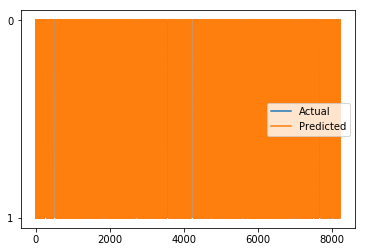

In [102]:

unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

In [103]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

[{'layer 1': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 288}}}, {'layer 2': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 2}}}]
